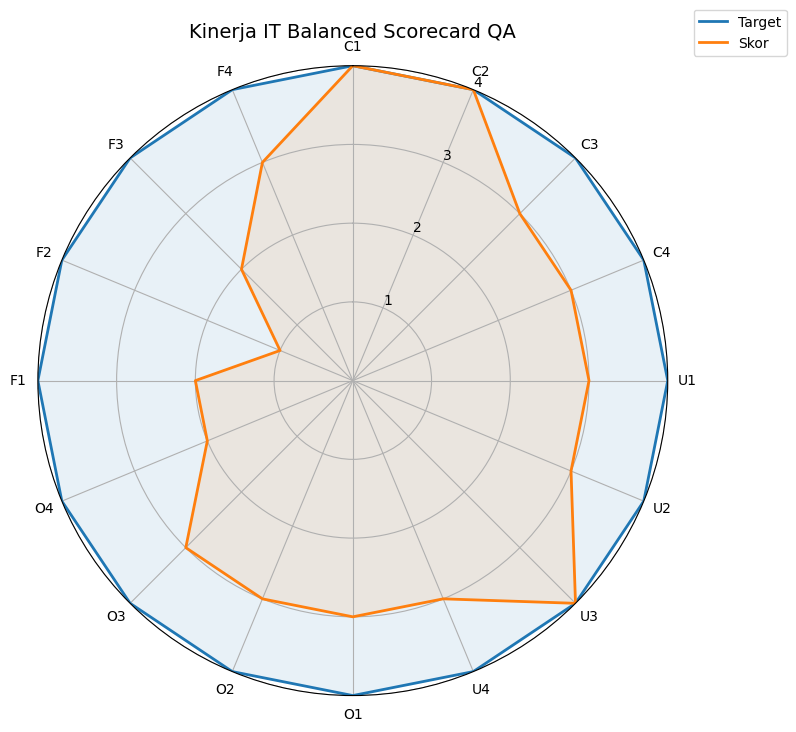

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# =========================
# DATA
# =========================
labels = ["C1", "C2", "C3", "C4", "U1", "U2", "U3", "U4", "O1", "O2", "O3", "O4", "F1", "F2", "F3", "F4"]
target = [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
skor   = [4, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 2, 2, 1, 2, 3]

# =========================
# PREPARATION
# =========================
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Tutup polygon (harus diulang elemen pertama)
angles += angles[:1]
target += target[:1]
skor += skor[:1]

# =========================
# PLOT
# =========================
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot Target
ax.plot(angles, target, linewidth=2, label="Target")
ax.fill(angles, target, alpha=0.1)

# Plot Skor
ax.plot(angles, skor, linewidth=2, label="Skor")
ax.fill(angles, skor, alpha=0.1)

# =========================
# AXIS & LABEL SETTING
# =========================
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

ax.set_thetagrids(np.degrees(angles[:-1]), labels)

ax.set_ylim(0, 4)
ax.set_yticks([1, 2, 3, 4])
ax.set_yticklabels(["1", "2", "3", "4"])

# =========================
# TITLE & LEGEND
# =========================
ax.set_title(
    "Kinerja IT Balanced Scorecard QA",
    size=14,
    pad=20
)

ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))

plt.tight_layout()
plt.show()


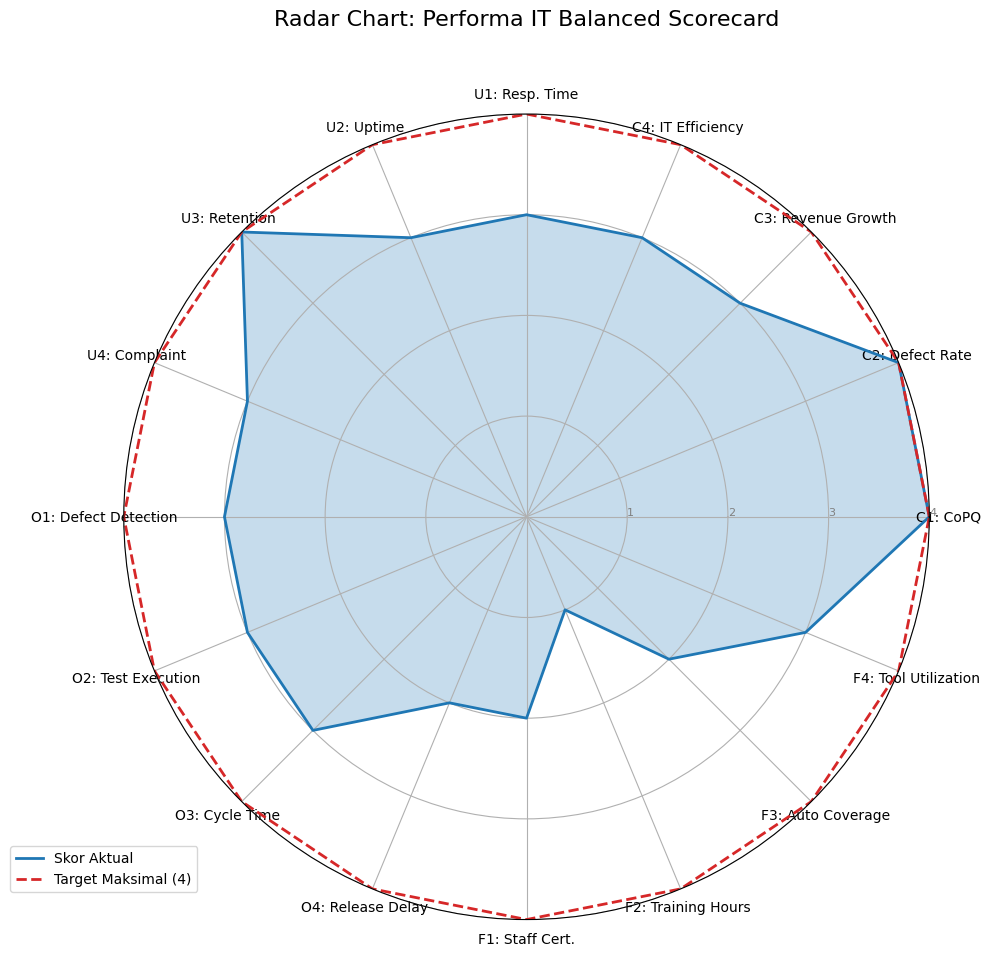

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Definisi Data berdasarkan Tabel ITBSC
labels = [
    "C1: CoPQ", "C2: Defect Rate", "C3: Revenue Growth", "C4: IT Efficiency",
    "U1: Resp. Time", "U2: Uptime", "U3: Retention", "U4: Complaint",
    "O1: Defect Detection", "O2: Test Execution", "O3: Cycle Time", "O4: Release Delay",
    "F1: Staff Cert.", "F2: Training Hours", "F3: Auto Coverage", "F4: Tool Utilization"
]
scores = [4, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 2, 2, 1, 2, 3]
target_val = 4
num_vars = len(labels)

# 2. Pengaturan Sudut untuk Diagram Radar
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Menutup loop grafik dengan menambahkan data awal ke akhir list
scores += scores[:1]
angles += angles[:1]
target_line = [target_val] * (num_vars + 1)

# 3. Pembuatan Plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Gambar sumbu per variabel
plt.xticks(angles[:-1], labels, color='black', size=10)

# Pengaturan label skor (1-4)
ax.set_rlabel_position(0)
plt.yticks([1, 2, 3, 4], ["1", "2", "3", "4"], color="grey", size=8)
plt.ylim(0, 4)

# Plot Skor Aktual
ax.plot(angles, scores, linewidth=2, linestyle='solid', label='Skor Aktual', color='#1f77b4')
ax.fill(angles, scores, '#1f77b4', alpha=0.25)

# Plot Garis Target
ax.plot(angles, target_line, linewidth=2, linestyle='dashed', label='Target Maksimal (4)', color='#d62728')

# Judul dan Legenda
plt.title('Radar Chart: Performa IT Balanced Scorecard', size=16, color='black', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.tight_layout()
plt.show()

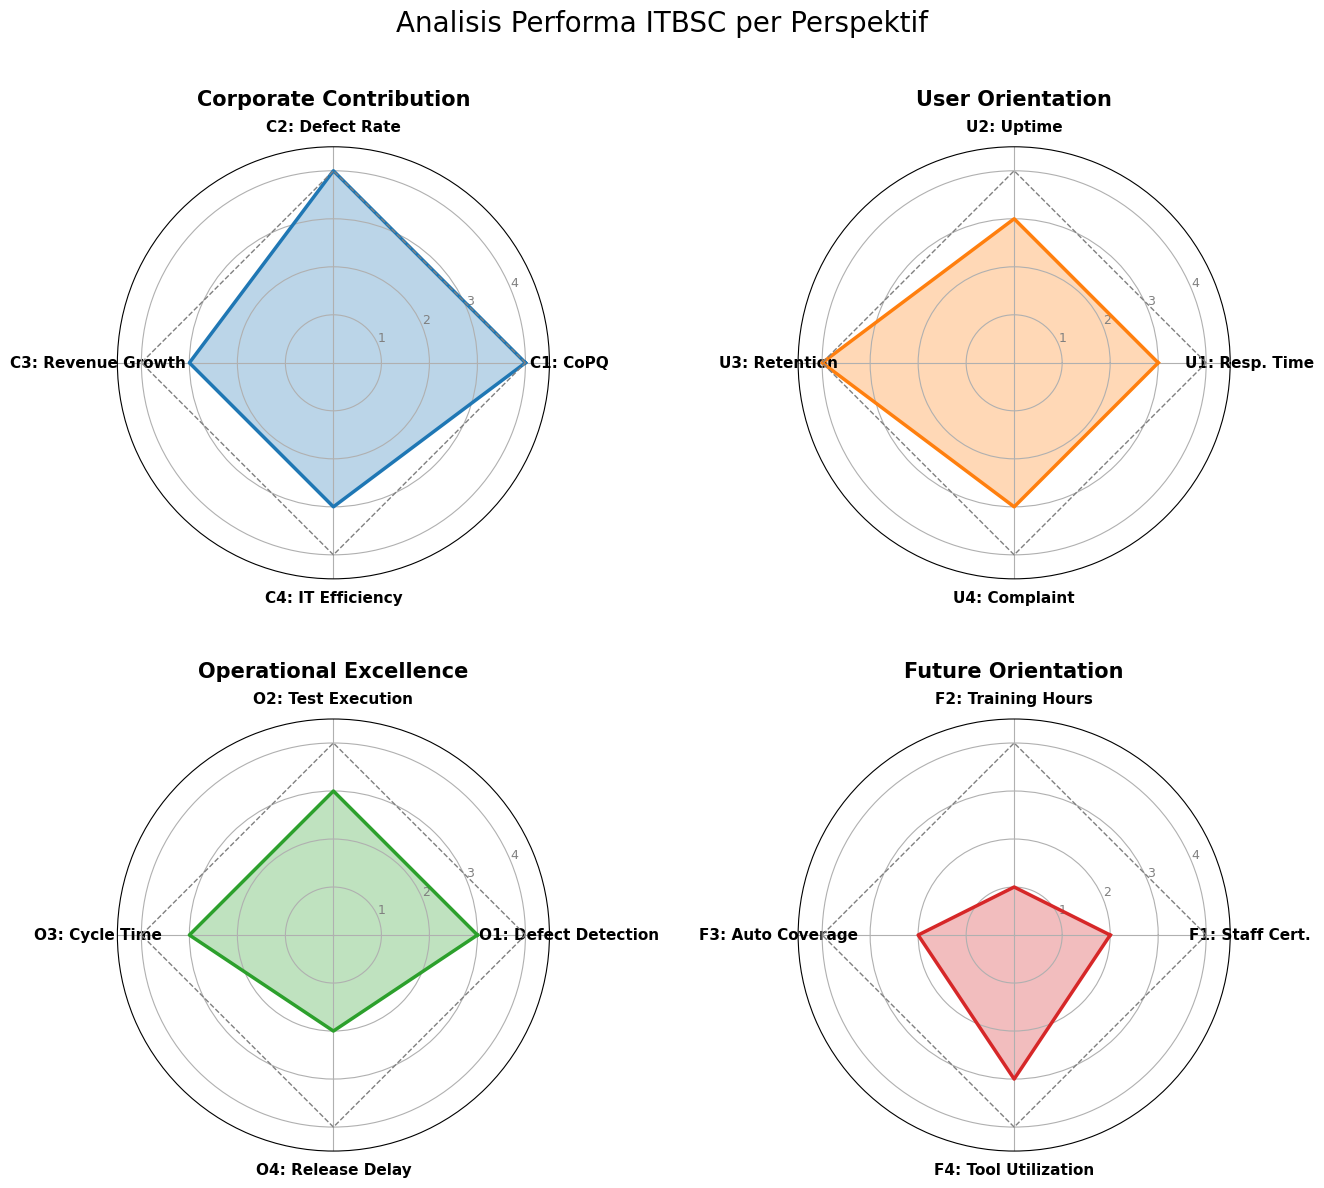

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Menyiapkan Data berdasarkan Kelompok Perspektif
data = {
    'Corporate Contribution': {
        'labels': ['C1: CoPQ', 'C2: Defect Rate', 'C3: Revenue Growth', 'C4: IT Efficiency'],
        'scores': [4, 4, 3, 3],
        'color': '#1f77b4' # Biru
    },
    'User Orientation': {
        'labels': ['U1: Resp. Time', 'U2: Uptime', 'U3: Retention', 'U4: Complaint'],
        'scores': [3, 3, 4, 3],
        'color': '#ff7f0e' # Oranye
    },
    'Operational Excellence': {
        'labels': ['O1: Defect Detection', 'O2: Test Execution', 'O3: Cycle Time', 'O4: Release Delay'],
        'scores': [3, 3, 3, 2],
        'color': '#2ca02c' # Hijau
    },
    'Future Orientation': {
        'labels': ['F1: Staff Cert.', 'F2: Training Hours', 'F3: Auto Coverage', 'F4: Tool Utilization'],
        'scores': [2, 1, 2, 3],
        'color': '#d62728' # Merah
    }
}

# 2. Inisialisasi Figure dengan 4 Subplot (2 Baris x 2 Kolom)
fig, axs = plt.subplots(2, 2, figsize=(14, 12), subplot_kw=dict(polar=True))
axs = axs.flatten()

# 3. Looping untuk membuat grafik di setiap perspektif
for i, (perspective, values) in enumerate(data.items()):
    labels = values['labels']
    scores = values['scores']
    color = values['color']
    
    # Menutup loop data (kembali ke titik awal)
    scores_plot = scores + [scores[0]]
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]
    
    # Plot Skor Aktual
    axs[i].plot(angles, scores_plot, color=color, linewidth=2.5, linestyle='solid', label='Skor Aktual')
    axs[i].fill(angles, scores_plot, color=color, alpha=0.3)
    
    # Plot Garis Target (Skor 4)
    target_line = [4] * (num_vars + 1)
    axs[i].plot(angles, target_line, color='grey', linewidth=1, linestyle='--', label='Target (4)')
    
    # Kustomisasi Sumbu dan Label
    axs[i].set_xticks(angles[:-1])
    axs[i].set_xticklabels(labels, size=11, weight='bold')
    axs[i].set_yticks([1, 2, 3, 4])
    axs[i].set_yticklabels(["1", "2", "3", "4"], size=9, color="grey")
    axs[i].set_ylim(0, 4.5)
    axs[i].set_title(perspective, size=15, pad=30, color='black', weight='bold')

# 4. Final Layout
plt.tight_layout(pad=4.0)
plt.suptitle('Analisis Performa ITBSC per Perspektif', size=20, y=1.02)
plt.show()